In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import (LinearRegression,LogisticRegression,Lasso,Ridge)
from sklearn.ensemble import (
RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor)
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import (
    accuracy_score,mean_absolute_error,mean_squared_error,classification_report,silhouette_score)
import xgboost as xgb
from xgboost import XGBClassifier,XGBRFClassifier
import optuna.visualization as vis
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

In [86]:
df=pd.read_csv('survey lung cancer.csv')

In [87]:
import os
print(os.getcwd())

c:\Users\MUDASSAR JUTT\OneDrive\Desktop


In [88]:
os.chdir('..')


In [89]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,0,0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,2,2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,3,3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,4,4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [90]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Gender', 'Age', 'Smoking',
       'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Chronic Disease',
       'Fatigue ', 'Allergy ', 'Wheezing', 'Alcohol Consuming', 'Coughing',
       'Shortness Of Breath', 'Swallowing Difficulty', 'Chest Pain',
       'Lung_Cancer'],
      dtype='object')

In [91]:
df.columns=df.columns.str.title()

In [92]:
df.to_csv('survey lung cancer.csv',index=False)

In [93]:
df=pd.read_csv('survey lung cancer.csv')

In [94]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,0,0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,2,2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,3,3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,4,4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [95]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Gender', 'Age', 'Smoking',
       'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Chronic Disease',
       'Fatigue ', 'Allergy ', 'Wheezing', 'Alcohol Consuming', 'Coughing',
       'Shortness Of Breath', 'Swallowing Difficulty', 'Chest Pain',
       'Lung_Cancer'],
      dtype='object')

In [96]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [97]:
df.head()

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [98]:
df.isnull().sum()

Gender                   0
Age                      0
Smoking                  0
Yellow_Fingers           0
Anxiety                  0
Peer_Pressure            0
Chronic Disease          0
Fatigue                  0
Allergy                  0
Wheezing                 0
Alcohol Consuming        0
Coughing                 0
Shortness Of Breath      0
Swallowing Difficulty    0
Chest Pain               0
Lung_Cancer              0
dtype: int64

In [99]:
df.duplicated().sum()

np.int64(33)

In [100]:
df.drop_duplicates(inplace=True)

In [101]:
df.shape

(276, 16)

In [102]:
df['Lung_Cancer'].value_counts()

Lung_Cancer
YES    238
NO      38
Name: count, dtype: int64

<Axes: xlabel='Lung_Cancer', ylabel='count'>

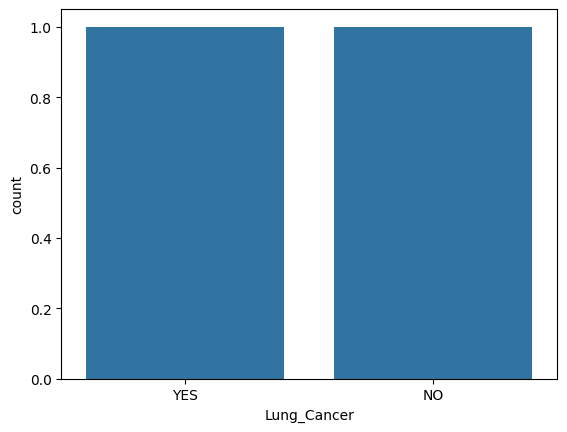

In [103]:
sns.countplot(df['Lung_Cancer'].value_counts())

In [104]:
df.describe()

,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 276 non-null    object
 1   Age                    276 non-null    int64 
 2   Smoking                276 non-null    int64 
 3   Yellow_Fingers         276 non-null    int64 
 4   Anxiety                276 non-null    int64 
 5   Peer_Pressure          276 non-null    int64 
 6   Chronic Disease        276 non-null    int64 
 7   Fatigue                276 non-null    int64 
 8   Allergy                276 non-null    int64 
 9   Wheezing               276 non-null    int64 
 10  Alcohol Consuming      276 non-null    int64 
 11  Coughing               276 non-null    int64 
 12  Shortness Of Breath    276 non-null    int64 
 13  Swallowing Difficulty  276 non-null    int64 
 14  Chest Pain             276 non-null    int64 
 15  Lung_Cancer            276 n

In [106]:
numrical_col=df.select_dtypes(include=['int64']).columns

In [107]:
numrical_col

Index(['Age', 'Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure',
       'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain'],
      dtype='object')

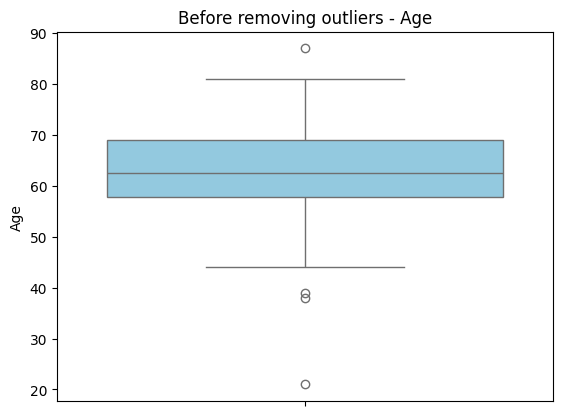

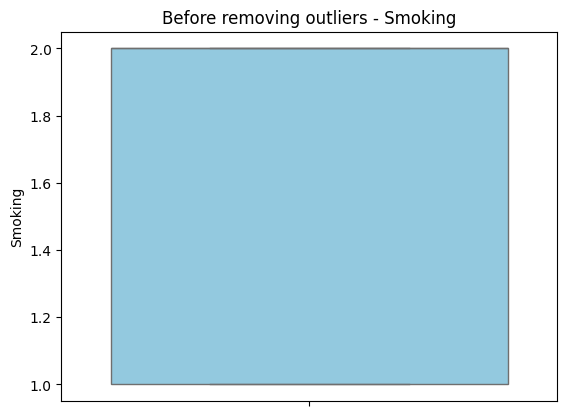

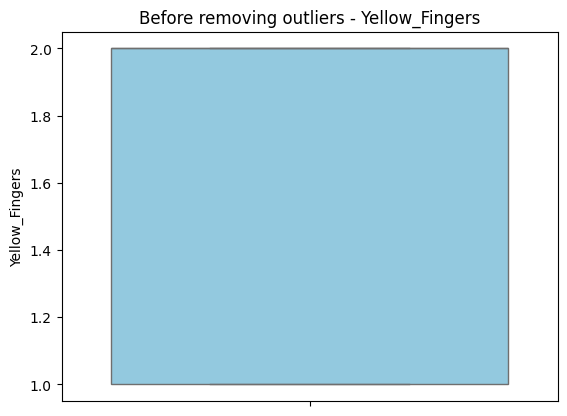

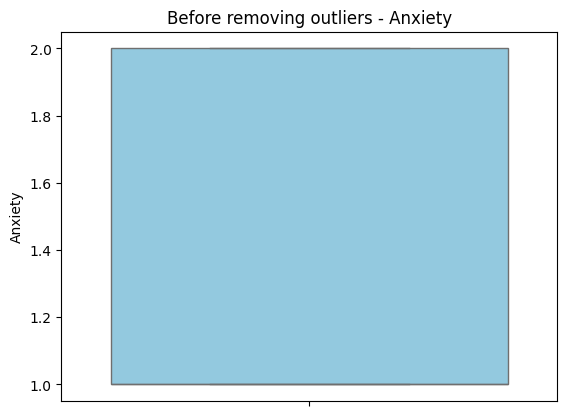

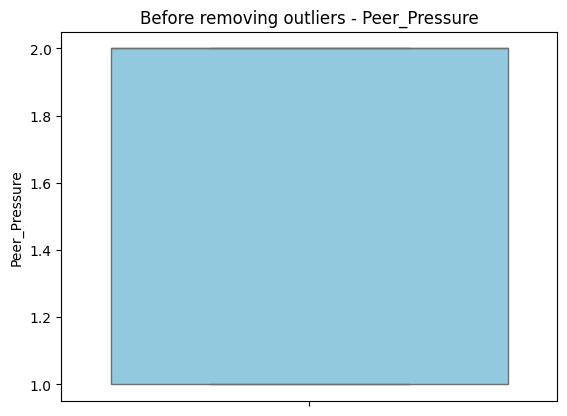

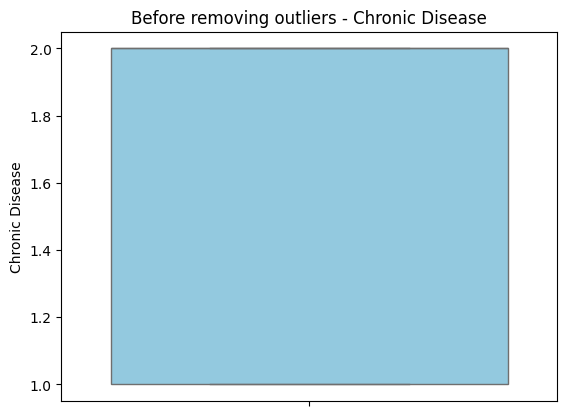

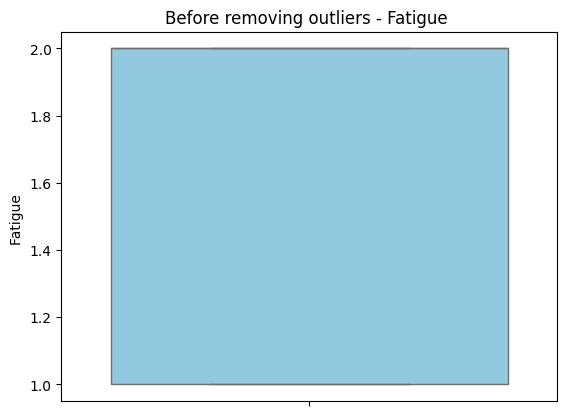

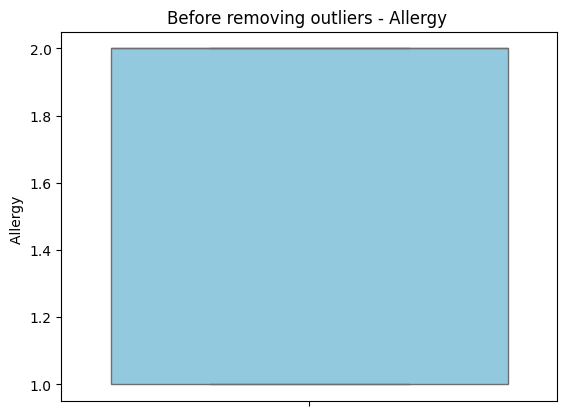

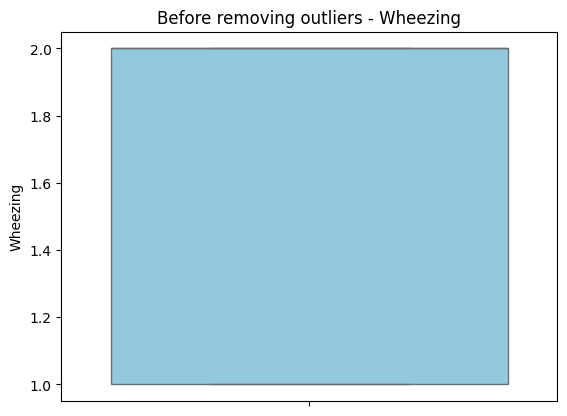

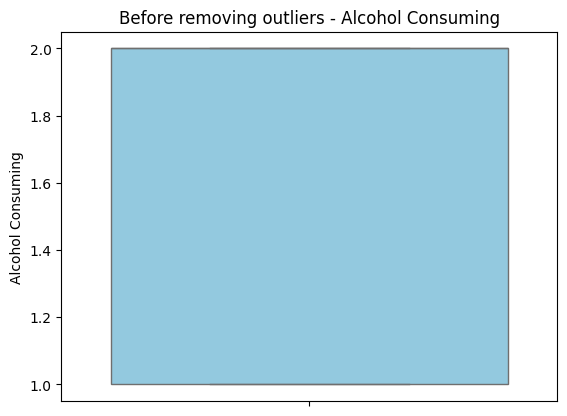

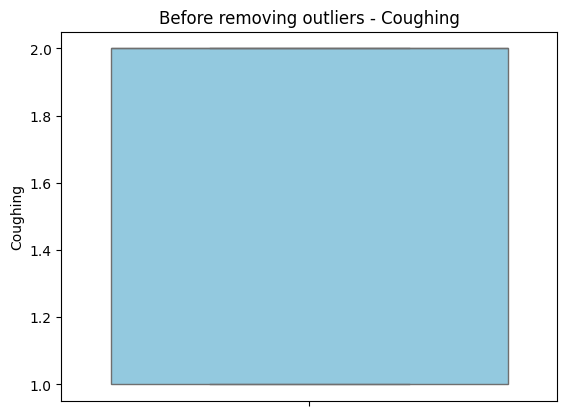

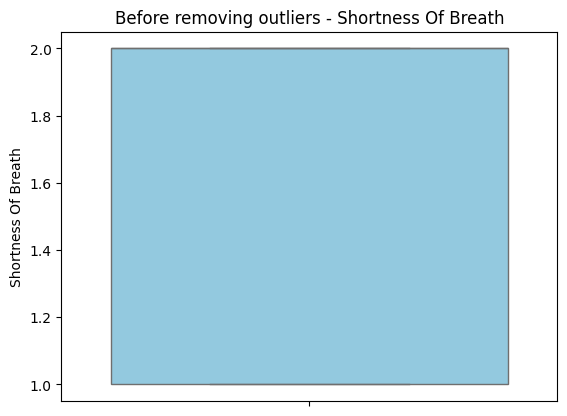

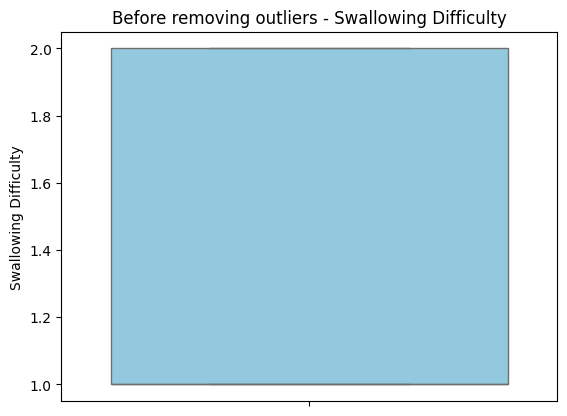

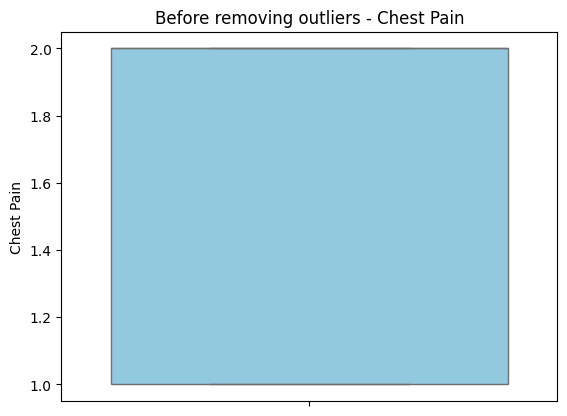

In [108]:
for i in numrical_col:
    sns.boxplot(y=df[i], color='skyblue')
    plt.title(f'Before removing outliers - {i}')
    plt.show()


In [109]:
df.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

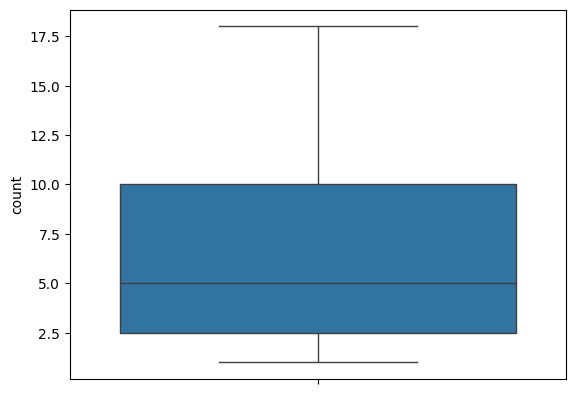

In [110]:
plt.Figure(figsize=(8,6))
sns.boxplot(df['Age'].value_counts())
plt.show()

In [111]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q1+1.5*IQR
lower_bound=Q3-1.5*IQR
df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)



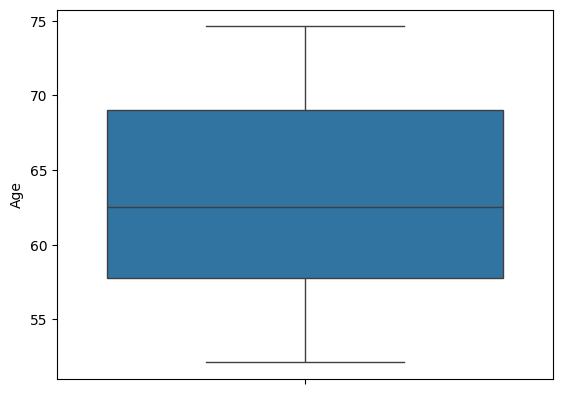

In [112]:
sns.boxplot(df['Age'])
plt.show()

In [113]:
df.head()

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,M,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [114]:
df['Gender'].value_counts()

Gender
M    142
F    134
Name: count, dtype: int64

In [115]:
df['Gender']=df['Gender'].map({'M':1,'F':0})

In [116]:
df.head()

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,1,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [117]:
encoder=LabelEncoder()
df['Lung_Cancer']=encoder.fit_transform(df['Lung_Cancer'])

In [118]:
df.head()

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,1,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,0


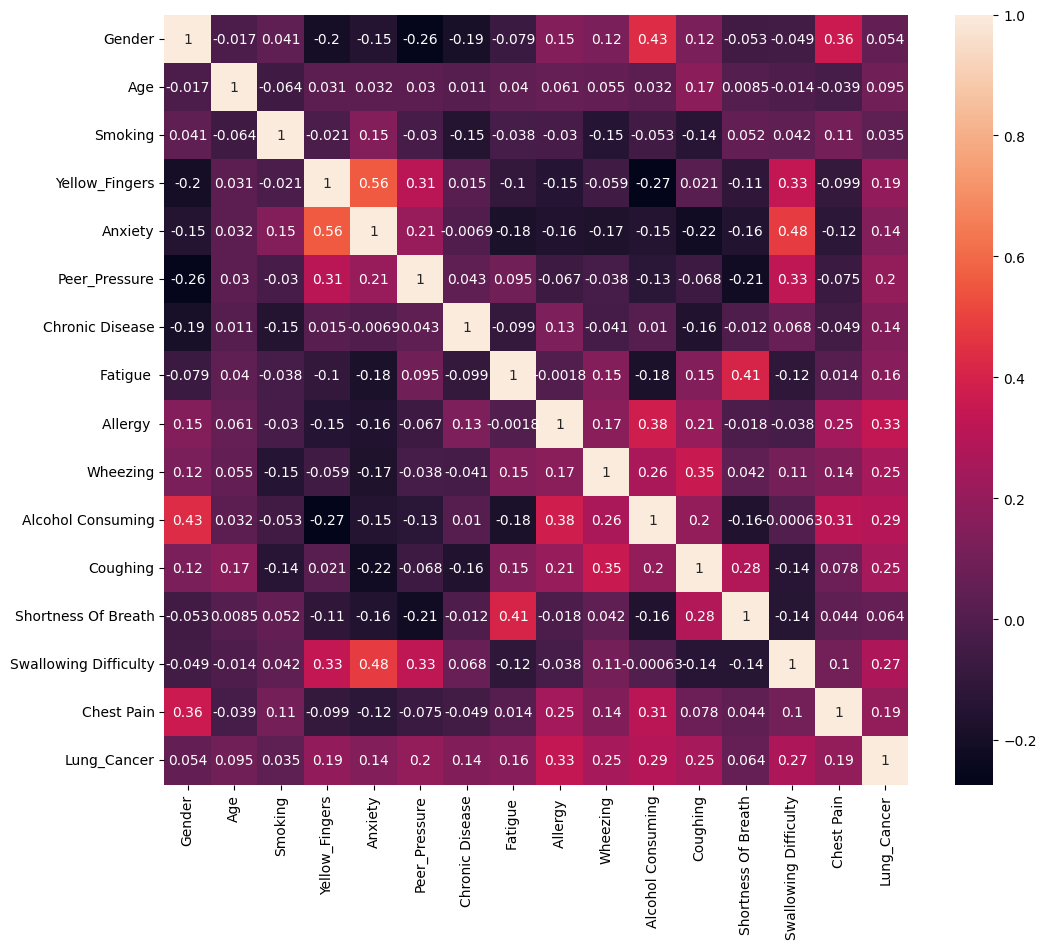

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [120]:
corrlation=pd.DataFrame(df.corr())

In [121]:
corrlation

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
Gender,1.000000,-0.016574,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
Age,-0.016574,1.000000,-0.064073,0.030841,0.031782,0.029989,0.011075,0.039892,0.060877,0.054569,0.031868,0.172352,0.008456,-0.014403,-0.038923,0.094628
Smoking,0.041131,-0.064073,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
Yellow_Fingers,-0.202506,0.030841,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
Anxiety,-0.152032,0.031782,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
Peer_Pressure,-0.261427,0.029989,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
Chronic Disease,-0.189925,0.011075,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
Fatigue,-0.079020,0.039892,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
Allergy,0.150174,0.060877,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
Wheezing,0.121047,0.054569,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054


In [122]:
df.head()

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,1,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [123]:


# Only take upper triangle (to avoid duplicates)
upper = corrlation.where(np.triu(np.ones(corrlation.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Highly correlated features to drop:", to_drop)


Highly correlated features to drop: []


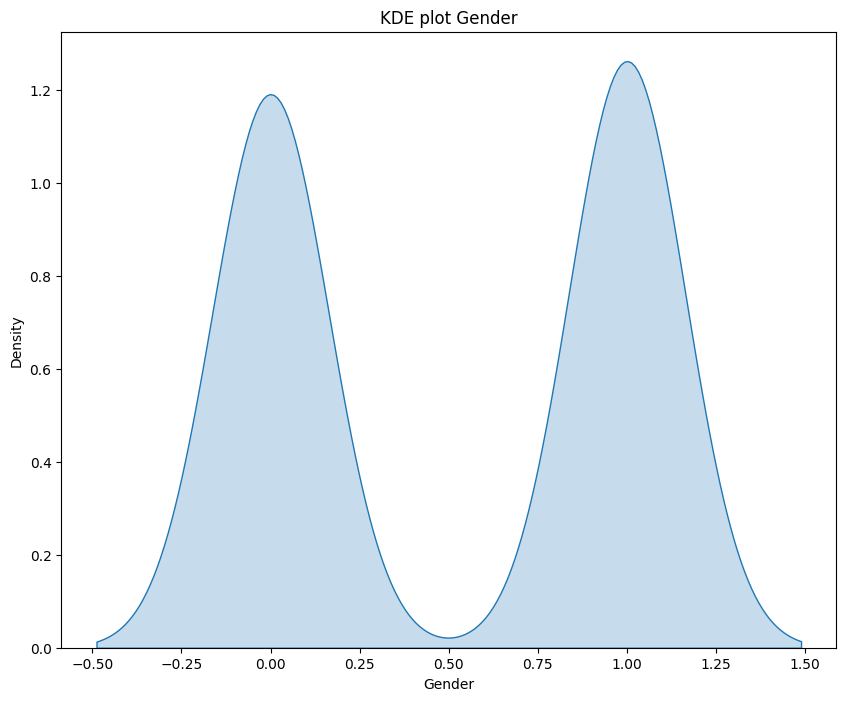

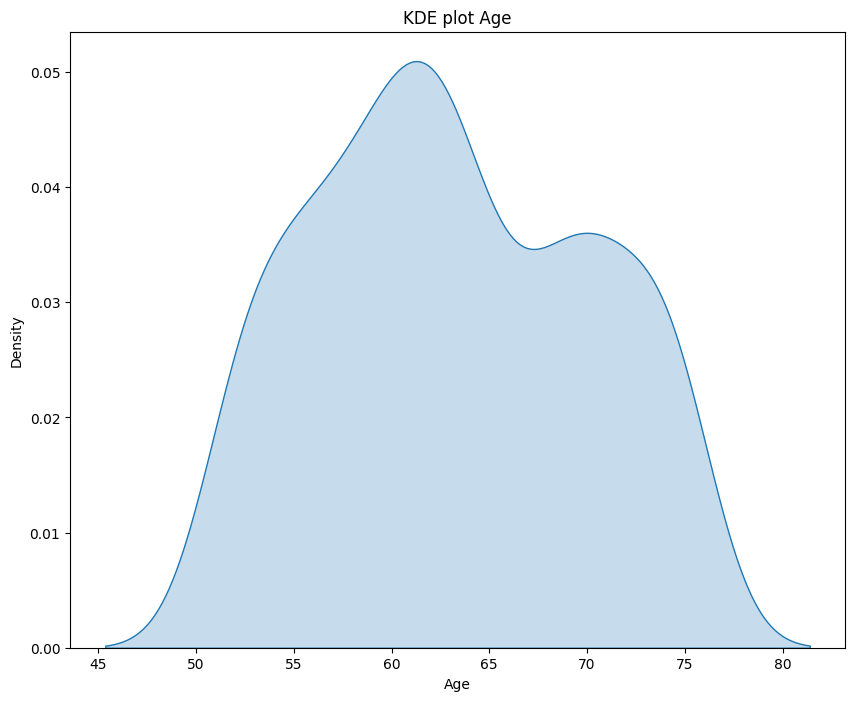

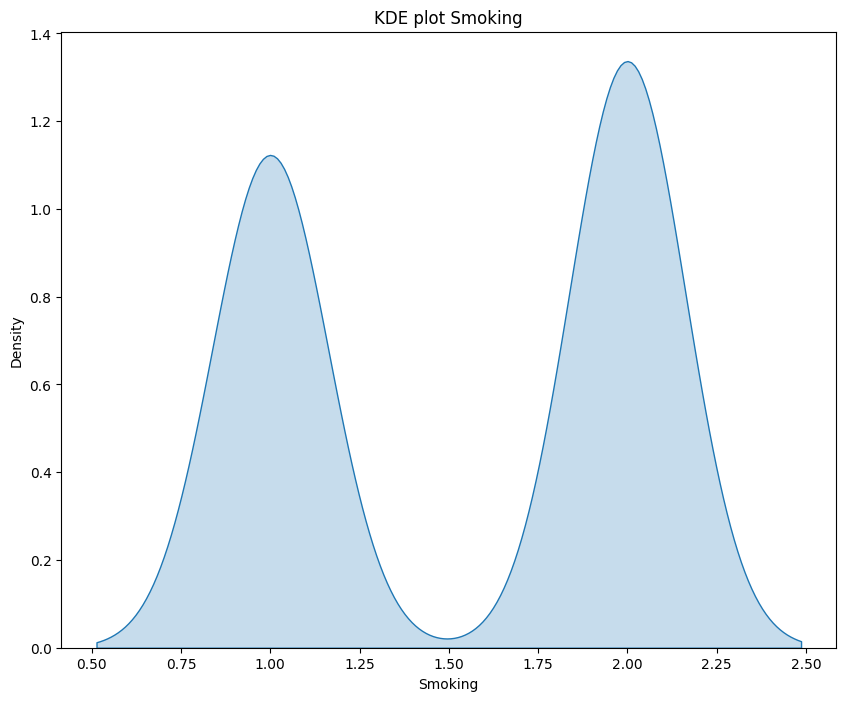

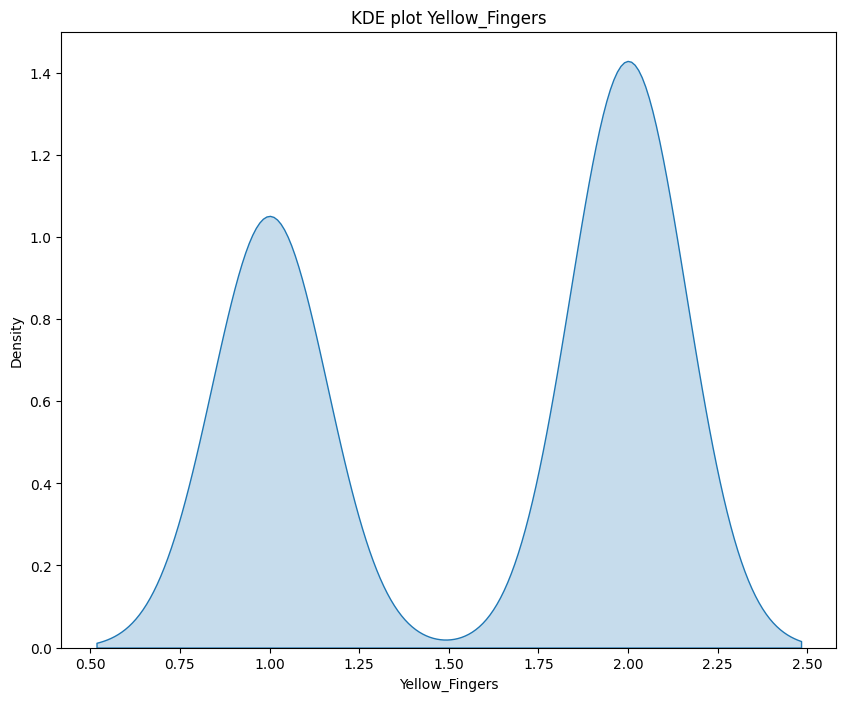

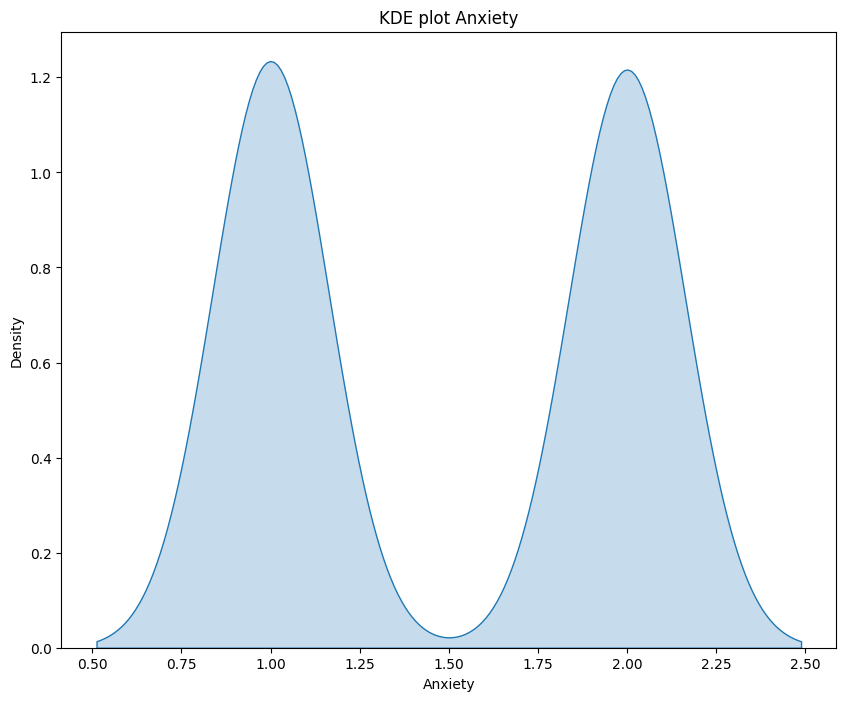

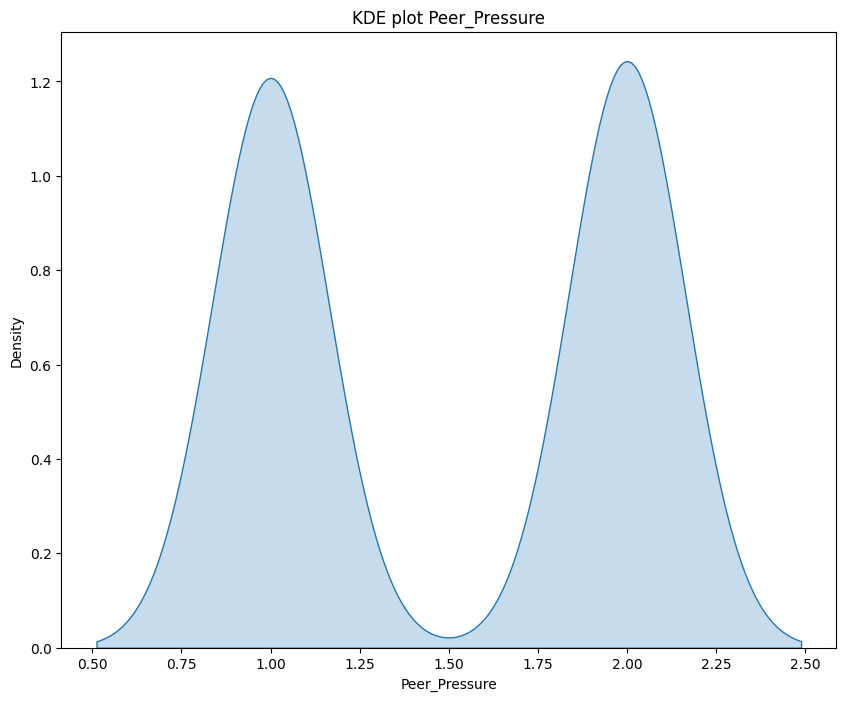

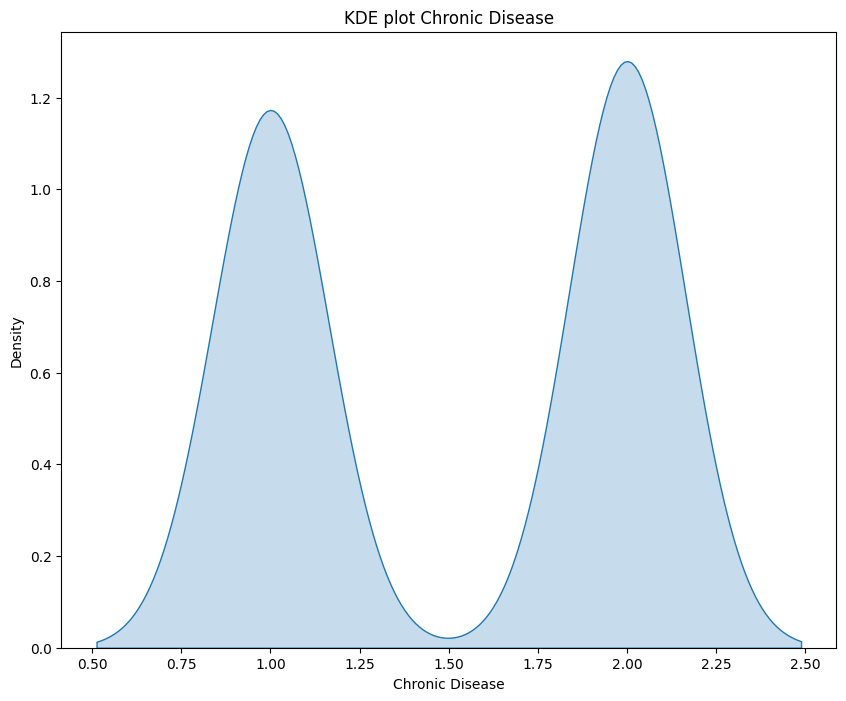

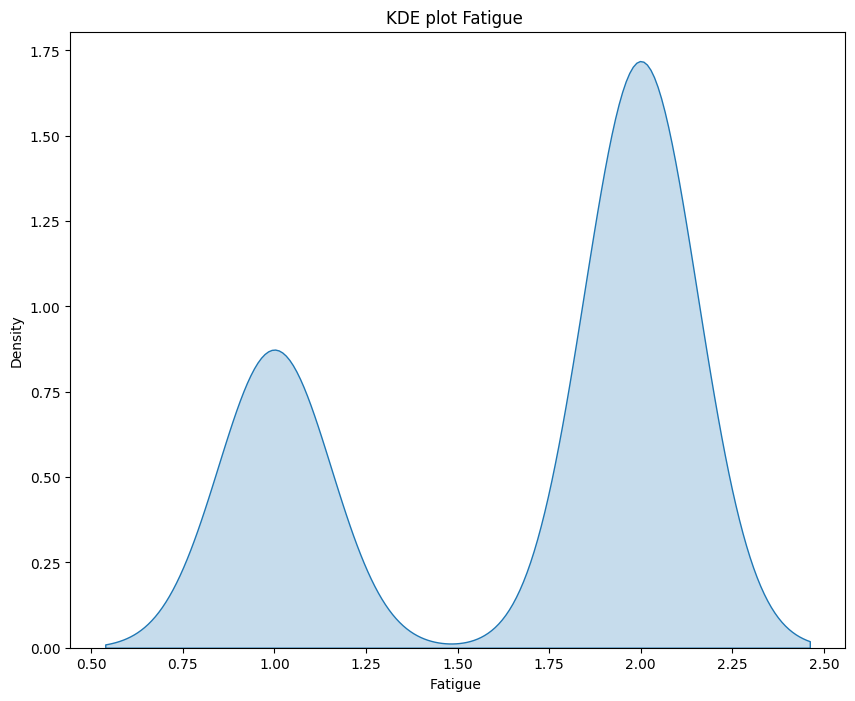

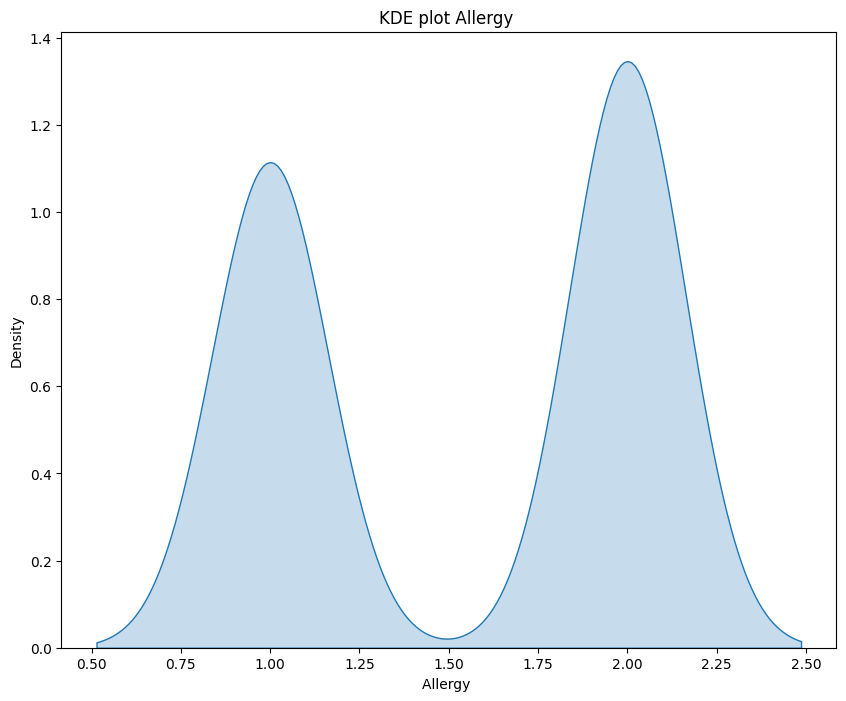

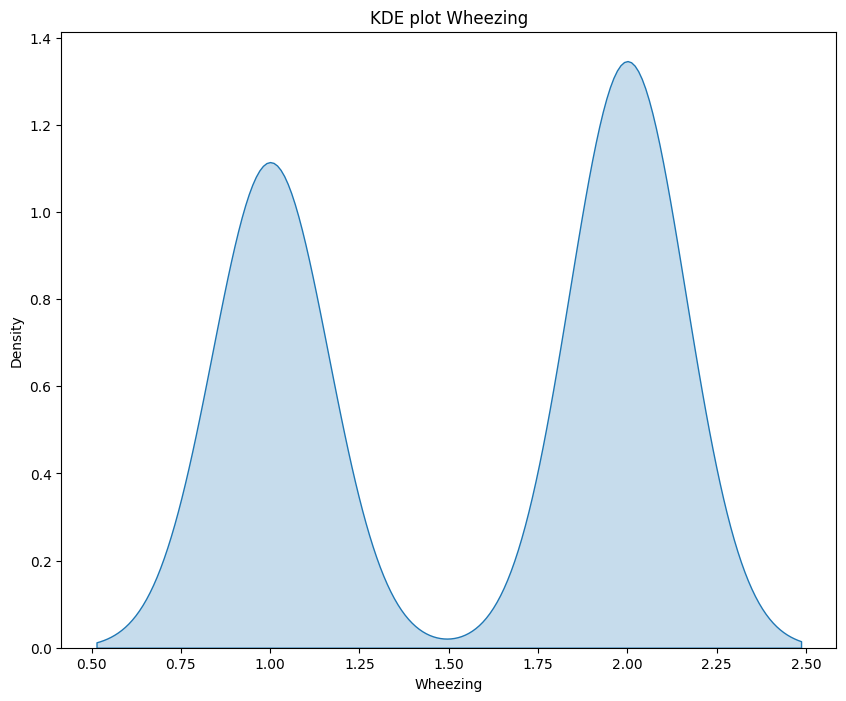

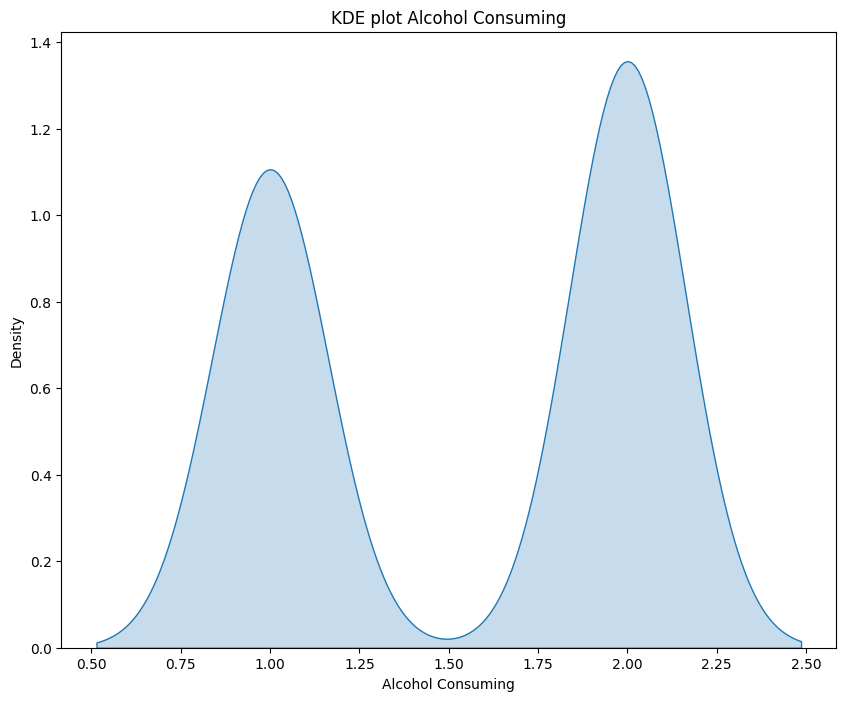

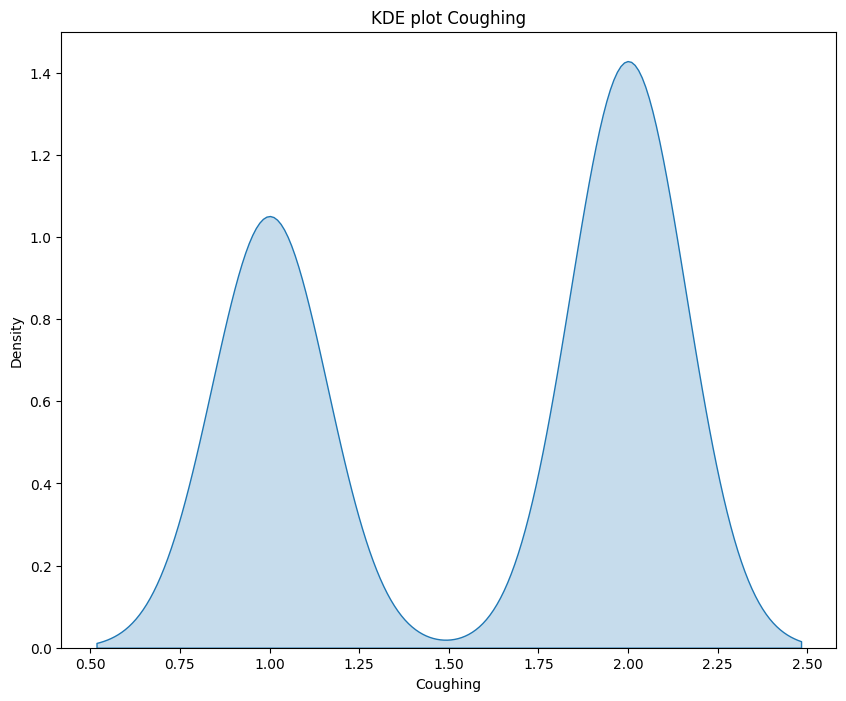

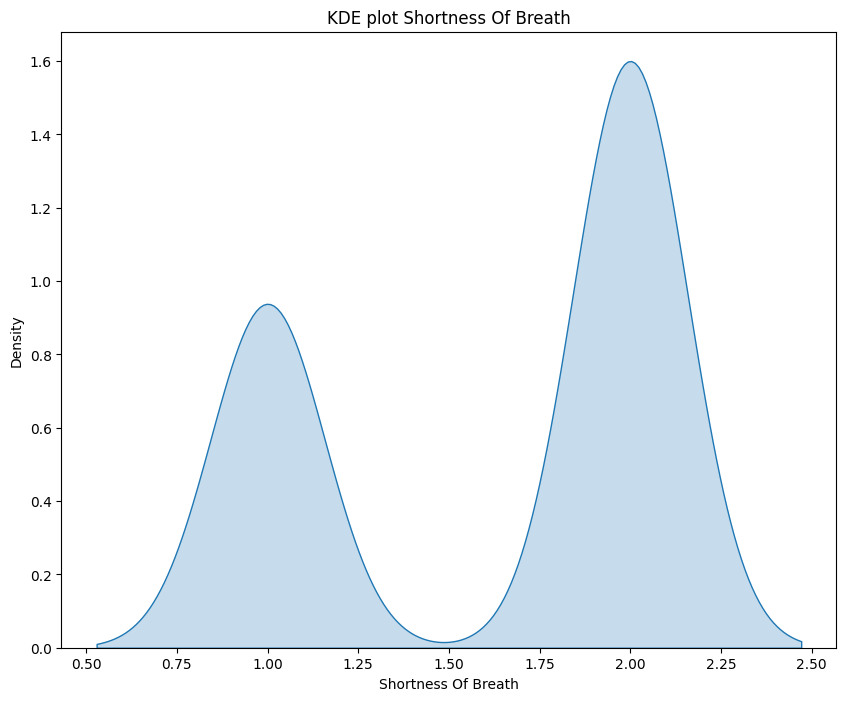

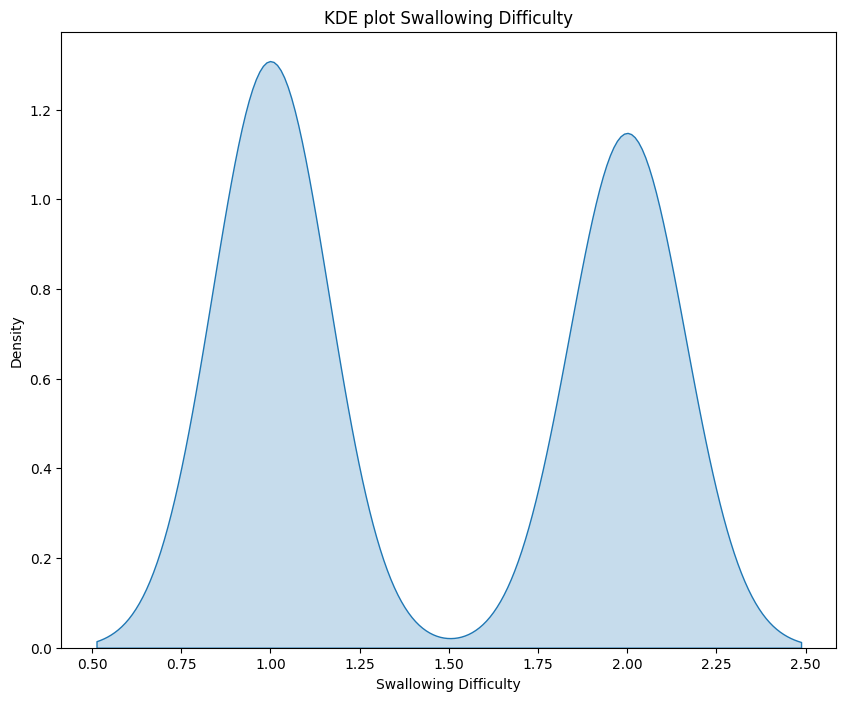

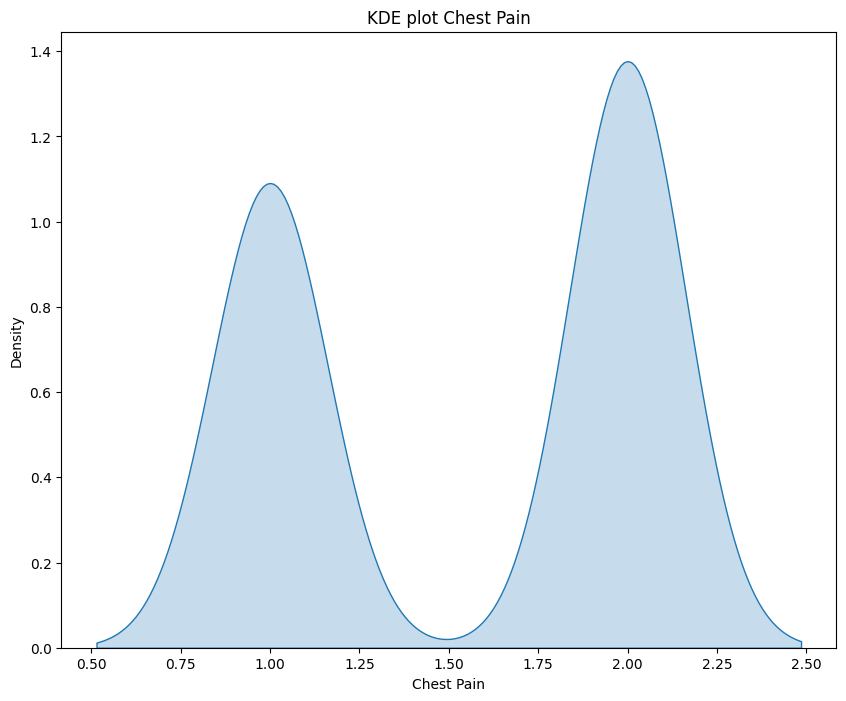

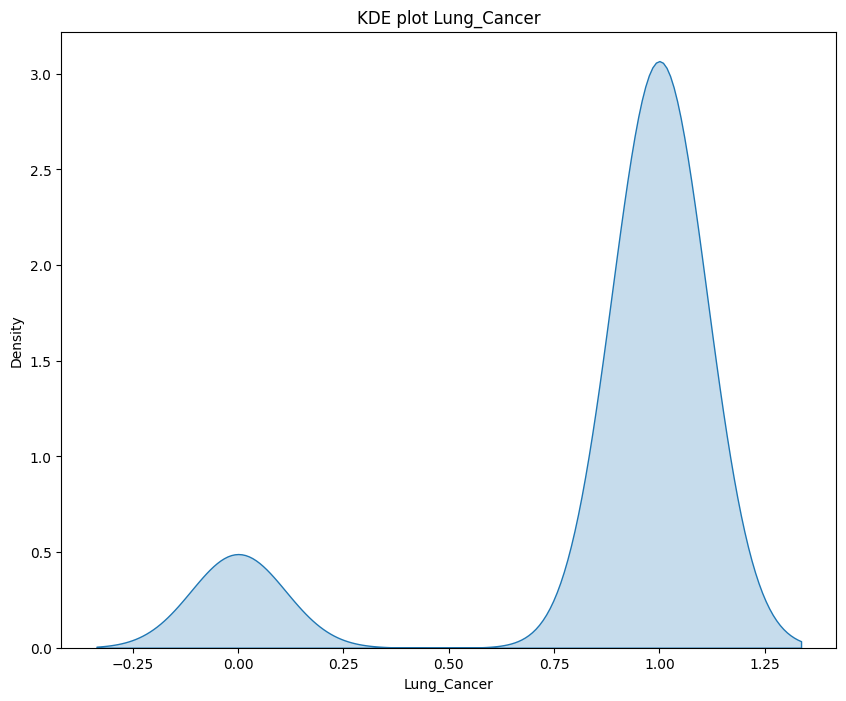

In [124]:
numrical_col=df.select_dtypes(include=['int64','int32','float64','float32']).columns
color=['green']
for i in numrical_col:
    plt.figure(figsize=(10,8))
    sns.kdeplot(data=df,x=i,palette=color,shade=True)
    plt.title(f'KDE plot {i}')
    plt.show()

In [125]:
df.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

In [126]:
df.head()

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,1,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [127]:
X=df.drop('Lung_Cancer',axis=1)
y=df['Lung_Cancer']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [129]:
numrical_col=df.select_dtypes(exclude='object').columns

In [130]:
sclar=StandardScaler()
X_train_sclaed=sclar.fit_transform(X_train)
X_test_sclaed=sclar.transform(X_test)

In [131]:
from sklearn.model_selection import cross_val_score
def objective(trial):
    model_name = trial.suggest_categorical(
        'classifier',
        ['AdaBoostClassifier',
         'DecisionTreeClassifier',
         'LogisticRegression',
         'RandomForestClassifier',
         'GradientBoostingClassifier',
         'XGBClassifier']
    )

    if model_name == 'AdaBoostClassifier':
        model = AdaBoostClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
        )

    elif model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(
            max_depth=trial.suggest_int('max_depth', 2, 20),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 20)
        )

    elif model_name == 'LogisticRegression':
        model = LogisticRegression(
            C=trial.suggest_float('C', 1e-3, 10.0, log=True),
            solver='liblinear'
        )

    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            max_depth=trial.suggest_int('max_depth', 2, 20),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 20)
        )

    elif model_name == 'GradientBoostingClassifier':
        model = GradientBoostingClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
            max_depth=trial.suggest_int('max_depth', 2, 10)
        )

    elif model_name == 'XGBClassifier':
        model = XGBClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            max_depth=trial.suggest_int('max_depth', 2, 10),
            use_label_encoder=False,
            eval_metric='logloss'
        )

    # Evaluate model
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean()


In [132]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50)

[I 2025-11-06 08:44:58,079] A new study created in memory with name: no-name-3c2025a6-cc9e-4a48-bc9d-ea42ec6122d0
[I 2025-11-06 08:45:01,438] Trial 0 finished with value: 0.8767532467532467 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 252, 'max_depth': 17, 'min_samples_split': 14}. Best is trial 0 with value: 0.8767532467532467.
[I 2025-11-06 08:45:03,028] Trial 1 finished with value: 0.8803896103896104 and parameters: {'classifier': 'XGBClassifier', 'n_estimators': 204, 'learning_rate': 0.010884621313989233, 'max_depth': 9}. Best is trial 1 with value: 0.8803896103896104.
[I 2025-11-06 08:45:03,133] Trial 2 finished with value: 0.8733116883116882 and parameters: {'classifier': 'LogisticRegression', 'C': 1.2242219231057707}. Best is trial 1 with value: 0.8803896103896104.
[I 2025-11-06 08:45:04,558] Trial 3 finished with value: 0.8624025974025974 and parameters: {'classifier': 'AdaBoostClassifier', 'n_estimators': 96, 'learning_rate': 0.08195120528613914}. B

In [133]:
print("Best Model:", study.best_params['classifier'])
print("Best Parameters:", study.best_params)
print("Best Accuracy:", study.best_value)


Best Model: GradientBoostingClassifier
Best Parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 216, 'learning_rate': 0.12996280552264022, 'max_depth': 2}
Best Accuracy: 0.8949999999999999


In [184]:
pipeline = Pipeline([
    ('model', GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.05,       # smaller learning rate
        max_depth=3,              # slightly deeper trees
        subsample=0.8,            # use only 80% of data per tree
        min_samples_split=5,      # require more samples per split
        min_samples_leaf=4,       # require more samples per leaf
        random_state=42
    ))
])

In [185]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)


In [186]:
pipeline.fit(X_train_sclaed, y_train, model__sample_weight=sample_weights)

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,loss,'log_loss'
,learning_rate,0.05
,n_estimators,150
,subsample,0.8
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,4


In [187]:
y_pred = pipeline.predict(X_test_sclaed)


In [188]:
y_proba = pipeline.predict_proba(X_test)[:, 1]


In [189]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9397590361445783


In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.95      0.99      0.97        70

    accuracy                           0.94        83
   macro avg       0.92      0.84      0.87        83
weighted avg       0.94      0.94      0.94        83



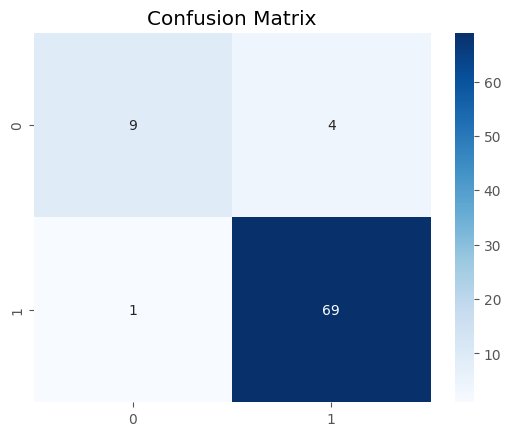

In [191]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [192]:
y_train_pred = pipeline.predict(X_train_sclaed)
y_test_pred = pipeline.predict(X_test_sclaed)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9637305699481865
Test Accuracy: 0.9397590361445783


In [193]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train_sclaed, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [0.79487179 0.84615385 0.84615385 0.78947368 0.86842105]
Mean CV accuracy: 0.8290148448043185


In [194]:
df.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

In [195]:
import pandas as pd
import numpy as np

# Example new data (must have same feature columns as X_train)
new_data = pd.DataFrame([{
    'Gender': 1,
    'Age': 55,
    'Smoking': 1,
    'Yellow_Fingers': 1,
    'Anxiety': 0,
    'Peer_Pressure': 1,
    'Chronic Disease': 0,
    'Fatigue': 1,
    'Allergy': 0,
    'Wheezing': 1,
    'Alcohol Consuming': 0,
    'Coughing': 1,
    'Shortness Of Breath': 1,
    'Swallowing Difficulty': 0,
    'Chest Pain': 1
}])


prediction = pipeline.predict(new_data)

print("Predicted Lung Cancer (1 = Yes, 0 = No):", prediction[0])


Predicted Lung Cancer (1 = Yes, 0 = No): 1


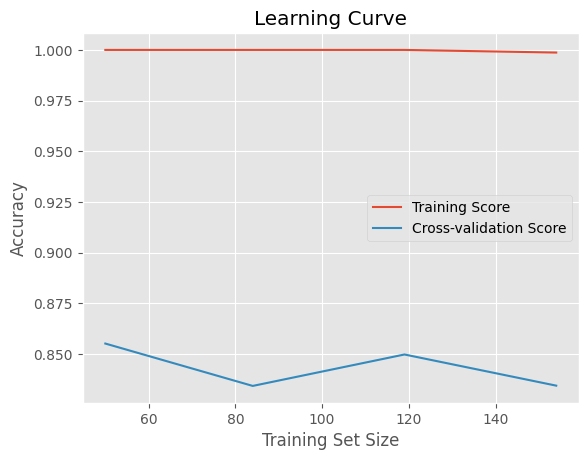

In [196]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train_sclaed, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [3]:
print('Helo')

Helo
